# Final Project I: Linier Regression

## Perkenalan

* Oleh:
1. Anita bae (PYTN - KS17 - 09)
2. Lathif Nur Irsyad (PYTN - KS17 - 07)
3. Muhammad Rofi Ariansyah (PYTN - KS17 - 05)


* Latar Belakang

  Regression analysis merupakan salah satu bidang terpenting dalam statistika dan machine learning. salah satu metode regression ialah Linier Regression. metode ini biasanya digunakan untuk memprediksi suatu data yang digunakan untuk menghitung hubungan linier antar variabel.

  Di New York, ride-hailing yang paling populer adalah Uber dan Lyft. Hal ini dikarenakan tidak terdapat banyak perbedaan dari segi biaya dan waktu antara moda ride-hailing dengan taksi.

  Untuk membantu masyarakat New York City dalam memilih transportasi online yang terbaik dengan harga murah berdasarkan berbagai macam pertimbangan, seperti cuaca, hari, dan jarak, maka akan dibuat sebuah Aplikasi Prediksi Harga Transportasi Online (Uber dan Lyft) di New York City dengan Menggunakan Perbandingan Metode Linear Regression dan Random Forest


*   Data yang digunakan (jumlah data, kelas dan sumber)
    Dataset yang digunakan yaitu uber vs Lyyft Dataset New York, USA yanng berisi 57 atribut, tetapi yang paling relevan ada 13 atribut dari smeuanya. Dari 57 data yang diperlukan antara lain:

    1. Cab_type: Merek transportasi online (uber, lyft)
    2. Name: Jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared)
    3. Hour: pukul berapa transportasi online dipesan (24 jam)
    4. Day: Tanggal transportasi online dipesan
    5. Month: Bulan apa saja transportasi online dipesan (bulan 11 dan 12)
    6. Source: Destinasi awal
    7. Destination: Destinasi akhir
    8. Price: Harga transportasi online (dollar US)
    9. Distance: Jarak yang ditempuh (km)
    10. Short_summary: cuaca ketika transportasi online dipesan(Overcast, Mostly cloud, partly cloudy, clear, light rain, rain, possible dizzle, foggy, drizle)
    11. Temperature: suhu ketika transportasi online dipesan (celcius)
    12. Visibility : jarak pengllihatan
    13. surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.
*   objective yang ingin dicapai
    1. Untuk mengetahui faktor yang mempengaruhi dalam prediksi tarif harga transportasi online.
    2. untuk menemukan model terbaik dalam memprediksi tarif harga transportasi online.
    3. untuk memberikan insight yang dapat membantu pihak penumpang mauoun pihak transportasi online dalam bentuk charts.







## *Import* Pustaka yang Dibutuhkan

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
#Library For DataFrame
import pandas as pd
import numpy as np

#Library For datetime
import datetime
import calendar

#Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

# Library for analysis
import scipy
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,mean_squared_error,r2_score
import pickle
import joblib as jb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

## Data *Loading*

In [ ]:
path = '/content/rideshare_kaggle.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [ ]:
df.shape

(13819, 57)

Melihat informasi mengenai struktur DataFrame


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           13819 non-null  object 
 1   timestamp                    13819 non-null  float64
 2   hour                         13819 non-null  int64  
 3   day                          13819 non-null  int64  
 4   month                        13819 non-null  int64  
 5   datetime                     13819 non-null  object 
 6   timezone                     13819 non-null  object 
 7   source                       13819 non-null  object 
 8   destination                  13819 non-null  object 
 9   cab_type                     13819 non-null  object 
 10  product_id                   13819 non-null  object 
 11  name                         13819 non-null  object 
 12  price                        12739 non-null  float64
 13  distance        

Melihat jumlah baris dan kolom pada data

In [ ]:
print("jumlah baris pada data ialah",len(df),"dan jumlah kolom pada data ialah",len(df.columns))

jumlah baris pada data ialah 13819 dan jumlah kolom pada data ialah 57


Menghitung nilai unique

In [ ]:
df.nunique()

id                             13819
timestamp                      12157
hour                              24
day                               17
month                              2
datetime                       10340
timezone                           1
source                            12
destination                       12
cab_type                           2
product_id                        13
name                              13
price                            102
distance                         368
surge_multiplier                   6
latitude                          11
longitude                         12
temperature                      308
apparentTemperature              319
short_summary                      9
long_summary                      11
precipIntensity                   63
precipProbability                 29
humidity                          51
windSpeed                        291
windGust                         286
windGustTime                      25
v

## Data *Cleaning*

Melihat keberadaan kolom data apakah ada yang kosong atau tidak

In [ ]:
df.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                           True
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

Menjumlahkan data kolom yang kosong

In [ ]:
df.isnull().sum()

id                                0
timestamp                         0
hour                              0
day                               0
month                             0
datetime                          0
timezone                          0
source                            0
destination                       0
cab_type                          0
product_id                        0
name                              0
price                          1080
distance                          0
surge_multiplier                  0
latitude                          0
longitude                         0
temperature                       0
apparentTemperature               0
short_summary                     0
long_summary                      0
precipIntensity                   0
precipProbability                 0
humidity                          0
windSpeed                         0
windGust                          0
windGustTime                      0
visibility                  

Melihat data yang sama

In [ ]:
df.duplicated().sum()

0

Menghapus baris yang terdapat missing values

In [ ]:
df_clean=df.dropna()
df_clean.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


Mengecek missing values

In [ ]:
df_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Melakukan crosstab pada kolom cab_type dan name

In [ ]:
pd.crosstab(df_clean.cab_type, df_clean.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,1043,1035,1042,1031,1036,1048,0,0,0,0
Uber,1083,1084,0,0,0,0,0,0,1089,1086,1084,1077


Mengambil fitur-fitur yang akan digunakan untuk permodelan dan menyimpannya dalam variabel baru

In [ ]:
col_group = [
    "cab_type",
    "name",
    "hour",
    "day",
    "month",
    "source",
    "destination",
    "price",
    "distance",
    "short_summary",
    "windSpeed",
    "temperature",
    "visibility",
    "surge_multiplier"
]

df_group = df_clean[col_group]
df_group.head(5)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0


**Keterangan**

Dari jumlah kolom yang ada diambil beberapa kolom yang diperlukan oleh case project ini, diantaranya:

cab_type,
name,
hour,
day,
month,
source,
destination,
price,
distance,
short_summary,
windSpeed,
temperature,
visibility,
surge_multiplier

Melihat total baris dan kolom pada df_group

In [ ]:
df_group.shape

(12738, 14)

Rename columns atau mengganti nama kolom

**Keterangan**

Selanjutnya melakukan rename beberapa kolom agar lebih mempermudah dalam melakukan pengerjaan, berikut ini adalah kolom yang dilakukan penggantian nama:

"cab_type": "transport_name",
"name": "kind",
"hour": "time",
"source": "start",
"destination": "finish",
"short_summary": "weather"

In [ ]:
df_group.rename(columns={
    "cab_type": "transport_name",
    "name": "kind",
    "hour": "time",
    "source": "start",
    "destination": "finish",
    "short_summary": "weather"}, inplace=True)

In [ ]:
df_group.head(5)

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0


Mengganti isi data pada kolom kind bila bernilai Taxi maka akan diganti dengan Uber Taxi karena Taxi tersebut merujuk kepada layanan dari Uber dan Lyft diganti menjadi Lyft Taxi

In [ ]:
df_group.loc[df_group["kind"] == "Taxi", "kind"] = "Uber Taxi"
df_group.loc[df_group["kind"] == "Lyft", "kind"] = "Lyft Taxi"

Mengecek total data pada setiap atribut

In [ ]:
for col in df_group.columns:
    print(col,': ')
    print(df_group[col].value_counts())
    print("  ")
    print("  ")

transport_name : 
Uber    6503
Lyft    6235
Name: transport_name, dtype: int64
  
  
kind : 
UberPool        1089
UberX           1086
UberXL          1084
Black SUV       1084
Black           1083
WAV             1077
Shared          1048
Lux             1043
Lux Black XL    1042
Lyft XL         1036
Lux Black       1035
Lyft Taxi       1031
Name: kind, dtype: int64
  
  
time : 
23    600
0     586
16    582
15    569
12    562
4     561
17    556
2     551
13    549
14    539
10    537
22    535
11    531
18    531
1     528
6     519
9     509
20    506
19    498
21    494
3     483
8     482
7     468
5     462
Name: time, dtype: int64
  
  
day : 
28    1427
27    1424
29    1151
1      832
16     822
3      808
30     806
17     803
14     797
2      777
13     746
15     745
18     657
26     614
4      221
10      69
9       39
Name: day, dtype: int64
  
  
month : 
12    7316
11    5422
Name: month, dtype: int64
  
  
start : 
Theatre District           1220
North Station    

Mengecek jenis cuaca yang ada pada kolom weather

In [ ]:
print(df_group["weather"].value_counts())

 Overcast             4007
 Mostly Cloudy        2726
 Partly Cloudy        2305
 Clear                1629
 Light Rain            966
 Rain                  447
 Possible Drizzle      366
 Foggy                 171
 Drizzle               121
Name: weather, dtype: int64


Membuat variabel baru df_copy untuk menampung nilai dari df_group

In [ ]:
df_copy = df_group.copy()
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,Uber,UberPool,1,16,12,Haymarket Square,Beacon Hill,7.5,1.36,Partly Cloudy,4.70,42.19,9.922,1.0
13813,Uber,WAV,3,3,12,Haymarket Square,Beacon Hill,7.0,1.36,Overcast,2.56,48.12,4.730,1.0
13814,Uber,UberXL,12,2,12,Haymarket Square,Beacon Hill,12.0,1.36,Light Rain,7.16,41.19,4.661,1.0
13816,Uber,UberX,11,1,12,Haymarket Square,Beacon Hill,7.0,1.36,Mostly Cloudy,4.24,32.31,9.850,1.0


Membuat Fungsi Rute. Rute tersebut menyesuaikan keadaan cuacanya apabila cuacanya bagus, maka yang akan dibayar oleh pelanggan tidak semahal saat hari gerimis atau bahkan hujan

**Keterangan**

Tarif (rate):

1. Overcast = 1,5
2. Mostly Cloudy = 2
3. Partly Cloudy = 1,5
4. Clear = 1
5. Light Rain = 2,5
6. Rain = 3
7. Possible Drizzle = 2
8. Foggy = 2
9. Drizzle = 2,5

In [ ]:
def rate(df_copy):
    # Jika Cuaca Overcast
    if df_copy["weather"] == " Overcast ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Mostly Cloudy
    elif df_copy["weather"] == " Mostly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Partly Cloudy
    elif df_copy["weather"] == " Partly Cloudy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*1.5, 2)
    # Jika Cuaca Light Rain
    elif df_copy["weather"] == " Light Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Rain
    elif df_copy["weather"] == " Rain ":
        hasil = round((df_copy["price"]/df_copy["distance"])*3, 2)
    # Jika Cuaca Possible Drizzle
    elif df_copy["weather"] == " Possible Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Foggy
    elif df_copy["weather"] == " Foggy ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2, 2)
    # Jika Cuaca Drizzle
    elif df_copy["weather"] == " Drizzle ":
        hasil = round((df_copy["price"]/df_copy["distance"])*2.5, 2)
    # Jika Cuaca Clear
    else:
        hasil = round(df_copy["price"]/df_copy["distance"], 2)
    return hasil

df_copy["rate"] = df_copy.apply(rate, axis=1)

In [ ]:
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0,22.73
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0,75.00
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0,15.91
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0,59.09
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0,30.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,Uber,UberPool,1,16,12,Haymarket Square,Beacon Hill,7.5,1.36,Partly Cloudy,4.70,42.19,9.922,1.0,8.27
13813,Uber,WAV,3,3,12,Haymarket Square,Beacon Hill,7.0,1.36,Overcast,2.56,48.12,4.730,1.0,7.72
13814,Uber,UberXL,12,2,12,Haymarket Square,Beacon Hill,12.0,1.36,Light Rain,7.16,41.19,4.661,1.0,22.06
13816,Uber,UberX,11,1,12,Haymarket Square,Beacon Hill,7.0,1.36,Mostly Cloudy,4.24,32.31,9.850,1.0,10.29


Membuat kolom route berisi data dari start sampai finish

In [ ]:
df_copy["route"] = df_copy["start"] + "-" + df_copy['finish']
df_copy

,transport_name,kind,time,day,month,start,finish,price,distance,weather,windSpeed,temperature,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,42.34,10.000,1.0,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,43.58,4.786,1.0,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,38.33,10.000,1.0,15.91,Haymarket Square-North Station
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,34.38,10.000,1.0,59.09,Haymarket Square-North Station
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,37.44,10.000,1.0,30.68,Haymarket Square-North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13812,Uber,UberPool,1,16,12,Haymarket Square,Beacon Hill,7.5,1.36,Partly Cloudy,4.70,42.19,9.922,1.0,8.27,Haymarket Square-Beacon Hill
13813,Uber,WAV,3,3,12,Haymarket Square,Beacon Hill,7.0,1.36,Overcast,2.56,48.12,4.730,1.0,7.72,Haymarket Square-Beacon Hill
13814,Uber,UberXL,12,2,12,Haymarket Square,Beacon Hill,12.0,1.36,Light Rain,7.16,41.19,4.661,1.0,22.06,Haymarket Square-Beacon Hill
13816,Uber,UberX,11,1,12,Haymarket Square,Beacon Hill,7.0,1.36,Mostly Cloudy,4.24,32.31,9.850,1.0,10.29,Haymarket Square-Beacon Hill


## Eksplorasi Data

Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.

In [ ]:
df_copy.describe()

,time,day,month,price,distance,windSpeed,temperature,visibility,surge_multiplier,rate
count,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000,12738.000000
mean,11.578034,18.002983,11.574344,16.393900,2.149394,6.218782,39.470415,8.470875,1.015564,16.860418
std,6.961005,9.973364,0.494461,9.209341,1.128484,3.156570,6.753555,2.597639,0.096446,37.479806
min,0.000000,1.000000,11.000000,2.500000,0.020000,0.450000,18.910000,0.717000,1.000000,0.990000
25%,6.000000,13.000000,11.000000,9.000000,1.250000,3.440000,36.315000,8.325000,1.000000,7.500000
50%,12.000000,17.000000,12.000000,13.500000,2.060000,5.920000,40.470000,9.882000,1.000000,12.325000
75%,17.000000,28.000000,12.000000,22.500000,2.860000,8.410000,43.570000,9.997000,1.000000,19.755000
max,23.000000,30.000000,12.000000,80.000000,7.460000,15.000000,57.220000,10.000000,2.500000,3437.500000


Diperoleh beberapa info seperti berikut:

*   Rata rata harga yang dikeluarkan untuk menggunakan layanan
    jasa sekitar 16.5 Dollar.

*  Tarif paling murah sekitar 2.5 dollar untuk 0.02 miles.
*  Rata rata temperatur saat pemesanan layanan jasa sekitar 39.58 derajat Farenheit.


Membuat variabel df_transport_name berisi total data dari kolom transport_name

In [ ]:
df_transport_name = df_copy['transport_name'].value_counts()
df_transport_name

Uber    6503
Lyft    6235
Name: transport_name, dtype: int64

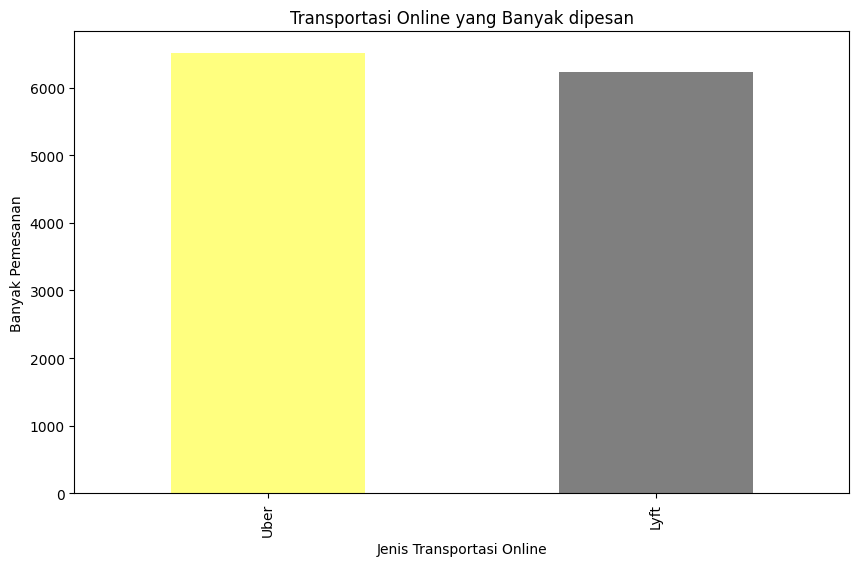

In [ ]:
df_transport_name.plot(kind='bar', figsize=(10,6), color=['yellow','black'], alpha=0.5)

plt.xlabel('Jenis Transportasi Online')
plt.ylabel('Banyak Pemesanan')
plt.title('Transportasi Online yang Banyak dipesan')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

kesimpulan

dari diagram diatas, diketahui bahwa transportasi online yang paling banyak dipesan ialah Uber dengan total pemesanan sebesar 330568. Sedangkan pengguna Lyft memiliki total pemesanan sebesar 307408

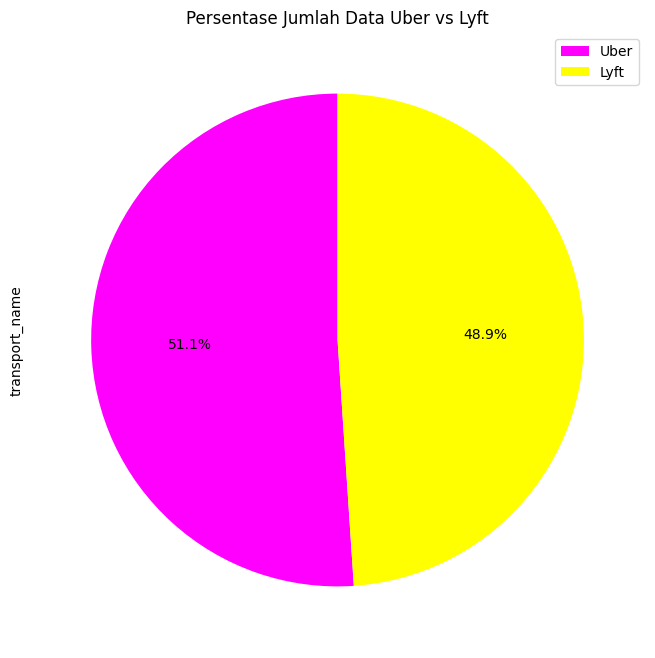

In [ ]:
# Memvisualisasikan kolom transport_name dalam bentuk pie chart
pie_color=['magenta','yellow']
df_transport_name.plot(kind="pie", figsize=(14,8), startangle=90, autopct="%1.1f%%", labels=None, colors=pie_color)
plt.title('Persentase Jumlah Data Uber vs Lyft')
plt.legend(labels=df_transport_name.index)

# Save Plot
plt.savefig("transport_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

kesimpulan

Dari hasil pie chart di atas, dapat diketahui bahwa persentase jumlah data pada Uber adalah 51.8% dan Lyft adalah 48.2%.

Melihat jenis layanan yang ditawarkan oleh Lyft

In [ ]:
df_kind_Lyft = pd.DataFrame(df_copy[(df_copy['transport_name']=='Lyft')].groupby(['kind'])['kind'].count())
df_kind_Lyft

,kind
kind,
Lux,1043
Lux Black,1035
Lux Black XL,1042
Lyft Taxi,1031
Lyft XL,1036
Shared,1048


Mengubah menjadi numerik

In [ ]:
df_num_kind = pd.DataFrame(df_copy.groupby(["transport_name"])["kind"].value_counts())
df_num_kind

kind
transport_name kind              
Lyft           Shared        1048
               Lux           1043
               Lux Black XL  1042
               Lyft XL       1036
               Lux Black     1035
               Lyft Taxi     1031
Uber           UberPool      1089
               UberX         1086
               Black SUV     1084
               UberXL        1084
               Black         1083
               WAV           1077

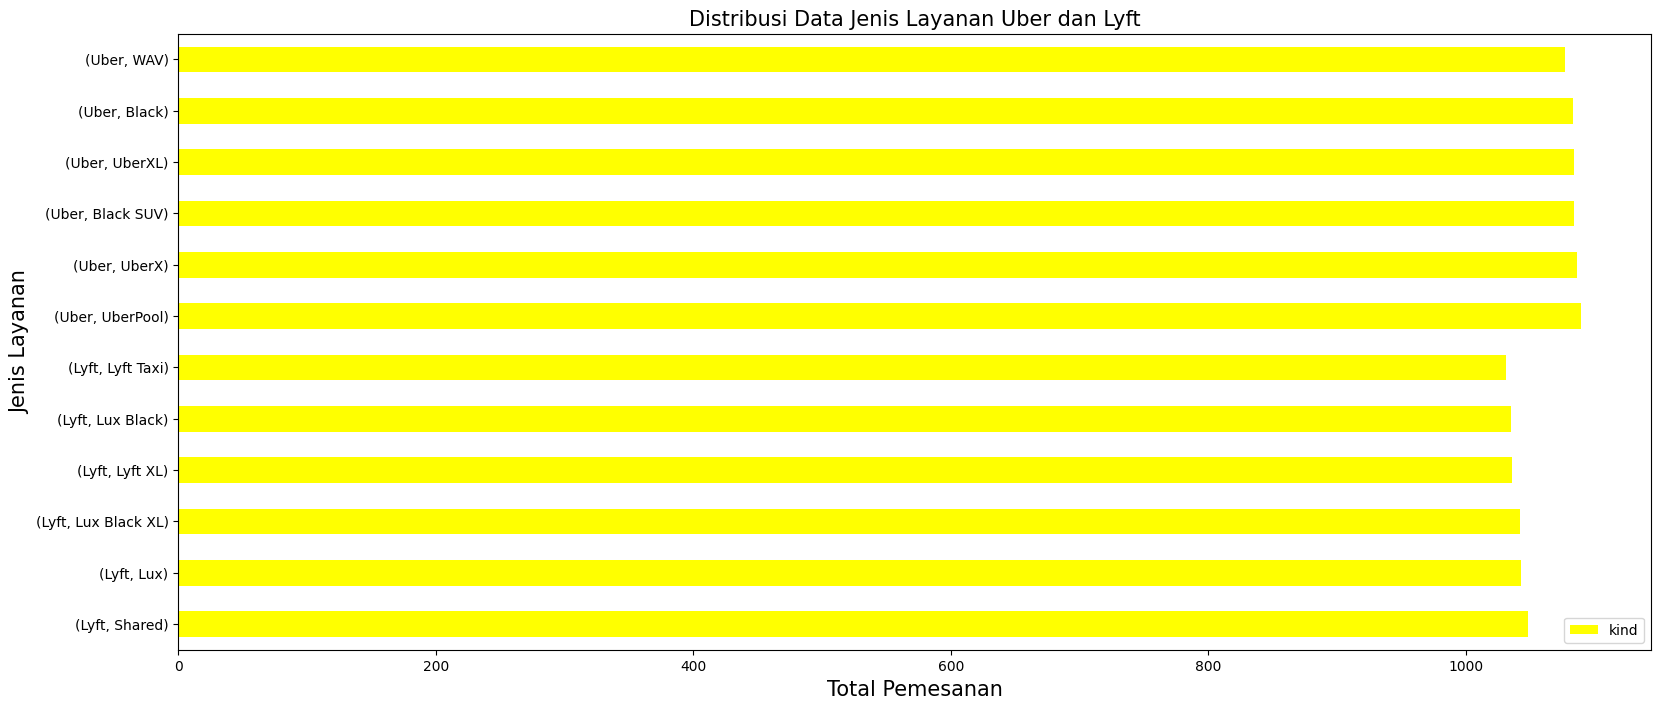

In [ ]:
#Memvisualiasikan kolom transport_name dan kind berdasarkan total kind
df_num_kind.plot(kind="barh", figsize=(19,8), color='yellow')

plt.title("Distribusi Data Jenis Layanan Uber dan Lyft", fontsize=15)
plt.ylabel("Jenis Layanan", fontsize=15)
plt.xlabel("Total Pemesanan", fontsize=15)

# Save Plot
plt.savefig("kind_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

Dari bar chart di atas, dapat diketahui bahwa Uber dengan semua tipe layanan (UberPool, UberX, Black, WAV, UberXL, dan Black SUV) memiliki data yang signifikan. Begitu pula dengan Lyft.

Explore Weather

In [ ]:
df_copy['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

Membuat dataframe yang berisi jumlah data penumpang berdasarkan cuaca

In [ ]:
df_weather=pd.DataFrame(df_copy.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,inplace=True)
df_weather['weather']=['clear','Drizzle','Foggy','Light Rain','Mostly Cloudy',
                      'Overcast','Partly Cloudy','Possible Drizzle','Rain']
df_weather=df_weather.set_index('weather')
df_weather

,value
weather,
clear,1629
Drizzle,121
Foggy,171
Light Rain,966
Mostly Cloudy,2726
Overcast,4007
Partly Cloudy,2305
Possible Drizzle,366
Rain,447


Menyiapkan dataframe untuk ploting pie chart

In [ ]:
df_weather_max=pd.DataFrame(df_copy.groupby(['weather','transport_name']).max()['distance'].sort_values())
df_weather_max=df_weather_max.rename(columns={'transport_name':'value'})
df_weather_max

,,distance
weather,transport_name,
Drizzle,Uber,4.55
Possible Drizzle,Lyft,5.35
Drizzle,Lyft,5.40
Foggy,Lyft,5.40
Rain,Lyft,5.40
Clear,Lyft,5.41
Mostly Cloudy,Lyft,5.41
Overcast,Lyft,5.44
Partly Cloudy,Lyft,5.44


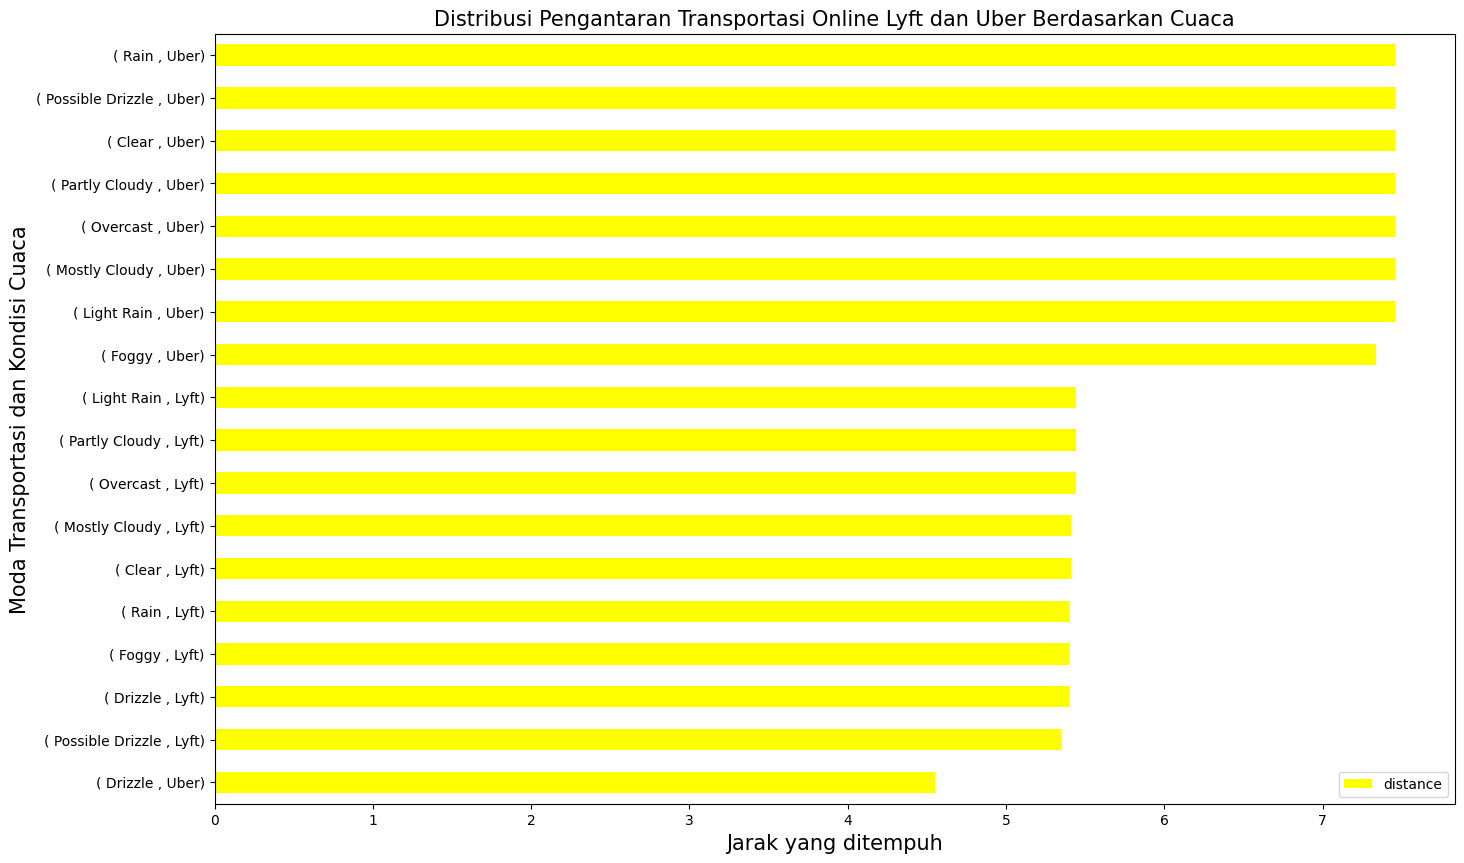

In [ ]:
#Memvisualisasikan kolom weather dengan transport_name dalam bentuk horizontal bar charts
df_weather_max.plot(kind="barh", figsize=(16,10), color='yellow')

plt.title("Distribusi Pengantaran Transportasi Online Lyft dan Uber Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Moda Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Jarak yang ditempuh", fontsize=15)

# Save Plot
plt.savefig("weather_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

**kesimpulan**

Dari bar chart di atas, dapat diketahui ketika cuaca sedang mendung, Uber mengantar penumpang dengan jarak yang ditempuh maksimal sejauh 7.86 km. Sedangkan Lyft dengan cuaca berawan, jarak yang ditempuh maksimal sejauh 6.33 km

Membuat variabel cuaca dan trans untuk mendukung data cuaca yang akan divisualisasikan dalam bentuk pie charts

In [ ]:
cuaca = df_copy['weather'].value_counts()
trans = pd.DataFrame(data=cuaca.index, columns=["weather"])
trans['values'] = cuaca.values

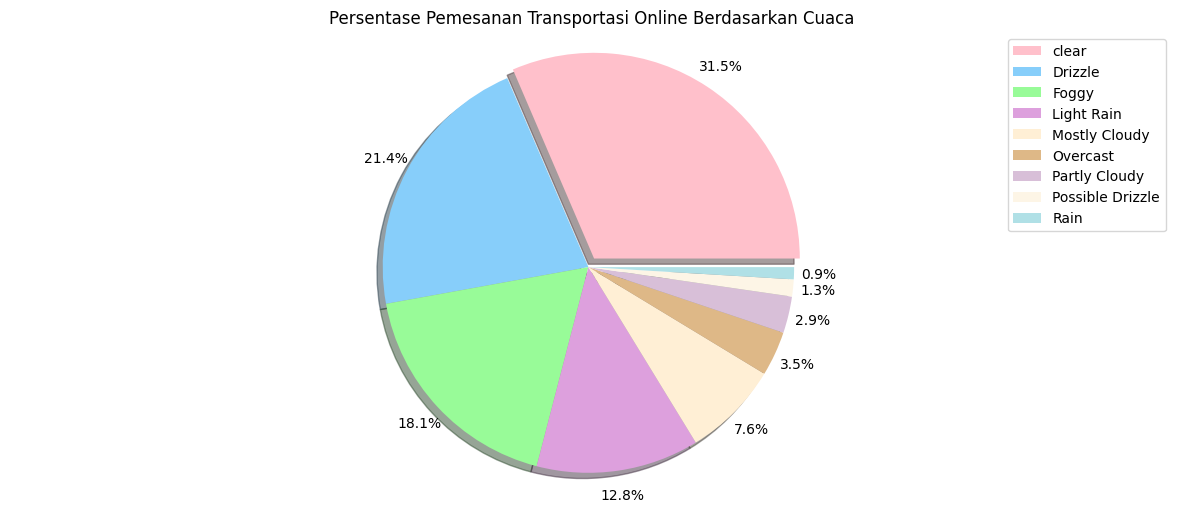

In [ ]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0,0,0,0,0,0,0,0]
color_list=['pink','lightskyblue','palegreen','plum','papayawhip','burlywood','thistle','oldlace','powderblue']
cuaca.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online Berdasarkan Cuaca')
plt.ylabel('')
plt.axis('equal')
plt.legend(labels=df_weather.index, loc='upper right')

# Save Plot
plt.savefig("weather_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

kesimpulan

Berdasarkan diagram lingkaran tersebut, persentase pemesanan transportasi online tertinggi pada keadaan cuaca cerah dengan 31.6% dan persentase terendah pada keadaan mendung dengan 3.4%

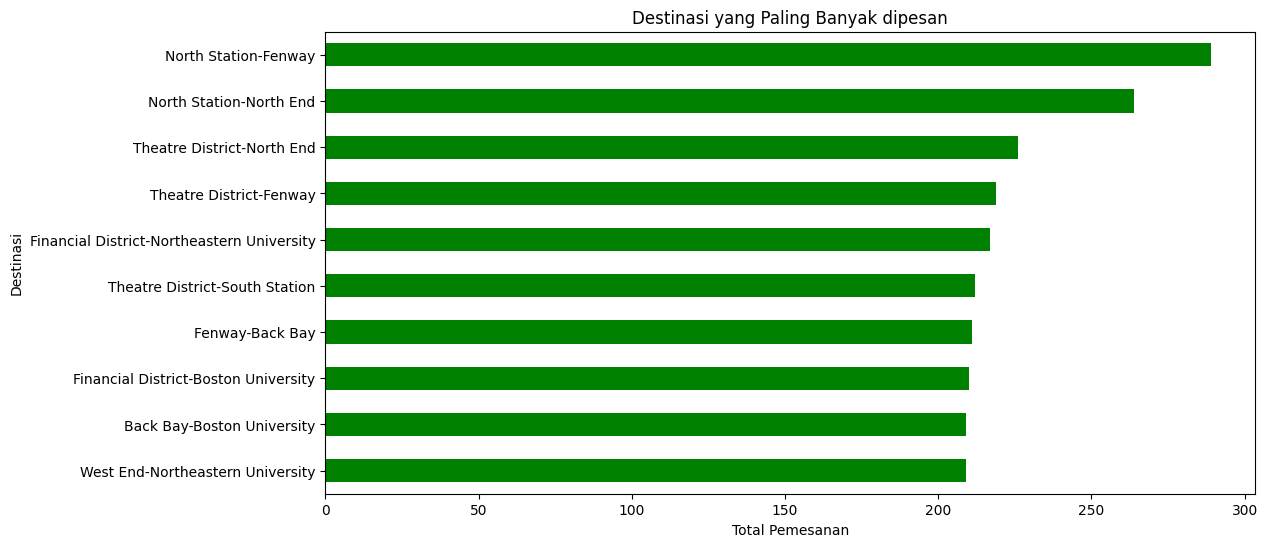

In [ ]:
#Explore Location(route)
rute = df_copy['route'].value_counts()

rute_sort = rute[0:10].sort_values()
rute_sort.plot(kind='barh', figsize=(12,6), color='green')

plt.xlabel('Total Pemesanan')
plt.ylabel('Destinasi')
plt.title('Destinasi yang Paling Banyak dipesan')

# Save Plot
plt.savefig("route_barh.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Kesimpulan

Dari hasil di atas, destinasi yang paling banyak dipesan yaitu dari South Station menuju Financial District dan sebaliknya dengan total 9534 kali.

Explore Month

In [ ]:
bulan = df_copy['month'].value_counts()
months = pd.DataFrame(data=bulan.index, columns=["month"])
months['values'] = bulan.values

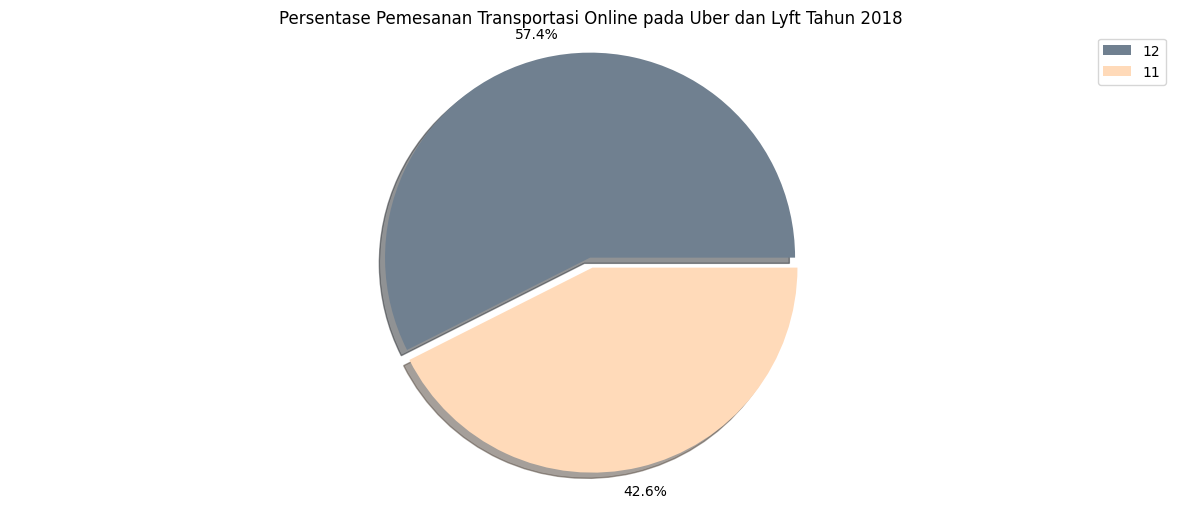

In [ ]:
#Memvisualisasikan kolom transport_name dalam bentuk pie chart
explode_list=[0.05,0]
color_list=['slategrey','peachpuff']
bulan.plot(kind="pie", figsize=(15,6), shadow=True, autopct="%1.1f%%", labels=None, colors=color_list, explode=explode_list, pctdistance=1.12)
plt.title('Persentase Pemesanan Transportasi Online pada Uber dan Lyft Tahun 2018')
plt.ylabel('')
plt.axis('equal')
plt.legend(bulan.index, loc='upper right')

# Save Plot
plt.savefig("month_pie.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

Kesimpulan

Dari hasil di atas, dapat diketahui bahwa dalam data hanya terdapat bulan November dan Desember. Artinya, hanya bulan tersebut yang direcord datanya. Bulan November mendapatkan hasil persentase sebesar 41.3% dan bulan Desember sebanyak 58.7%. Bulan Desember mendominasi pemesanan penumpang. Hal ini dikarenakan bulan Desember merupakan bulan liburan, sehingga banyak penumpang yang memesan transportasi online.

Menghapus kolom day dan temperature karena menurut kami tidak memiliki pengaruh kepada rate atau harganya yang mana temperature tentu juga mengikuti bagaimana cuaca di saat tersebut

In [ ]:
df_copy=df_copy.drop(['day','temperature'], axis=1)
df_copy.head(5)

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,Lyft,Shared,9,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,8.66,10.000,1.0,22.73,Haymarket Square-North Station
1,Lyft,Lux,2,11,Haymarket Square,North Station,11.0,0.44,Rain,11.98,4.786,1.0,75.00,Haymarket Square-North Station
2,Lyft,Lyft Taxi,1,11,Haymarket Square,North Station,7.0,0.44,Clear,7.33,10.000,1.0,15.91,Haymarket Square-North Station
3,Lyft,Lux Black XL,4,11,Haymarket Square,North Station,26.0,0.44,Clear,5.28,10.000,1.0,59.09,Haymarket Square-North Station
4,Lyft,Lyft XL,3,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,9.14,10.000,1.0,30.68,Haymarket Square-North Station


## Data *Preprocessing*

### Encoding

In [ ]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


# encoding_pipeline = Pipeline([
#     ('encoding', MultiColumnLabelEncoder(columns=["transport_name", "kind", "time", "month", "start", "finish",
#                                                   "price", "distance", "weather", "windSpeed", "visibility", "surge_multiplier", "rate", "route", ]))
# ])
encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns=["transport_name", "kind", "time", "month", "start", "finish"
                                                  , "weather", "windSpeed", "visibility", "surge_multiplier", "rate", "route", "distance" ]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_rfe = encoding_pipeline.fit_transform(df_copy)

In [ ]:
df_rfe.head()

,transport_name,kind,time,month,start,finish,price,distance,weather,windSpeed,visibility,surge_multiplier,rate,route
0,0,7,9,1,5,7,5.0,5,4,231,226,0,1903,33
1,0,2,2,0,5,7,11.0,5,8,274,57,0,2905,33
2,0,5,1,0,5,7,7.0,5,0,197,226,0,1340,33
3,0,4,4,0,5,7,26.0,5,0,141,226,0,2837,33
4,0,6,3,0,5,7,9.0,5,6,240,226,0,2331,33


Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate

In [ ]:
x_transform = df_rfe.drop(["price", "rate"], axis=1)
print(x_transform.shape)

(12738, 12)


Membuat variabel Y untuk menampung kolom price

In [ ]:
Y=df_rfe['price']
print(Y.shape)

(12738,)


### Features selection

Membuat variabel sfs untuk menampung hasil dari feature selection

In [ ]:
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 5)

Mencari 10 atribut yang paling berpengaruh menggunakan SFS()

In [ ]:
sfs.fit(x_transform, Y)
sfs.k_feature_names_

('transport_name',
 'kind',
 'month',
 'start',
 'finish',
 'distance',
 'weather',
 'windSpeed',
 'surge_multiplier',
 'route')

Mencari dan mencetak 10 atribut yang paling berpengaruh beserta score-nya.

In [ ]:
x_transform = df_rfe.drop(['price', 'rate'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x_transform, Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_transform.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs        Score
1               kind  6759.720875
6           distance  1565.987186
10  surge_multiplier   689.706878
0     transport_name    71.391331
5             finish    32.284443
11             route     8.526049
4              start     5.449062
8          windSpeed     3.288832
2               time     0.925515
9         visibility     0.837607


Didapatkan 10 atribut teratas untuk menjadi pembanding dari harga, karena nilai signifikan visibility terlalu kecil daripada atribut yang lain maka kita akan gunakan 8 atribut teratas untuk membuat model perkiraan harga yakni kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.

Membuat variabel df_x yang berisi 8 atribut paling berpengaruh

In [ ]:
X_fit=df_rfe[['transport_name','kind', 'start', 'finish', 'visibility','weather', 'distance','surge_multiplier']]

In [ ]:
X_fit

,transport_name,kind,start,finish,visibility,weather,distance,surge_multiplier
0,0,7,5,7,226,4,5,0
1,0,2,5,7,57,8,5,0
2,0,5,5,7,226,0,5,0
3,0,4,5,7,226,0,5,0
4,0,6,5,7,226,6,5,0
...,...,...,...,...,...,...,...,...
13812,1,8,5,1,183,6,87,0
13813,1,11,5,1,54,5,87,0
13814,1,10,5,1,52,3,87,0
13816,1,9,5,1,154,4,87,0


## Model

Setelah melakukan data cleaning dan data preprocessing, maka diperoleh data yang akan digunakan untuk pelatihan model selanjutnya. Terdapat 8 atribut yang akan digunakan untuk membuat model perkiraan harga, yaitu transport_name, kind, start, finish, visibility, weather, distance, surge_multiplier.

Metode pengujian yang akan digunakan adalah metode Linear Regression dengan pembanding Random Forest. Linear Regression adalah salah satu cara yang paling terkenal dan paling sederhana untuk memprediksi output, yang cocok dengan model linier untuk meminimalkan jumlah sisa kuadrat antara nilai prediksi dan nilai sebenarnya. Meskipun kelemahan utama dari linear regression adalah mengasumsikan linieritas antara variabel yang diprediksi dan variabel respons, tetapi data jarang dapat dipisahkan secara linier di dunia nyata.

Sedangkan Random Forest berfungsi karena menggabungkan prediksi dari beberapa algoritma machine learning untuk membuat prediksi yang lebih akurat daripada model individual. Ini menggunakan bias rendah dan varians tinggi untuk mengurangi kesalahan.

Ada berbagai metrics untuk mengukur kinerja model regresi, tetapi pada project ini menggunakan metrik R-squares dan RMSE (Root-mean-square-error) untuk menemukan model terbaik.

Membagi data menjadi Training dan Testing dengan proporsi 80% dan 20% karena ini adalah perpaduan yang sering digunakan dalam pembuatan model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_fit, Y, test_size=0.20, random_state=350)

Melakukan normalisasi dengan StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Pelatihan Model

Membuat model Linear Regression

In [ ]:
model1 = LinearRegression()

Membuat model Random Forest

In [ ]:
model2 = RandomForestRegressor(n_estimators = 50, random_state = 15)

### Evaluasi Model

#### Linear Regression

In [ ]:
lr_model = model1.fit(X_train, Y_train)

Melihat nilai intercept

In [ ]:
lr_model.intercept_

16.455348380765457

Melihat nilai Koefisien

In [ ]:
model1.coef_

array([ 1.21280539, -5.6807812 ,  0.1738614 , -0.04496374,  0.04446957,
       -0.05745666,  3.09669877,  1.80861857])

In [ ]:
predictions_lr = lr_model.predict(X_test)
l_lr_train_r2 = model1.score(X_train,Y_train)
l_lr_test_r2 = model1.score(X_test, Y_test)

print('Akurasi (Data Pelatihan) : %.4f' % l_lr_train_r2)
print('Akurasi (Data Pengujian) : %.4f' % l_lr_test_r2)

Akurasi (Data Pelatihan) : 0.5091
Akurasi (Data Pengujian) : 0.4955


In [ ]:
lr_mse = mean_squared_error(predictions_lr, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 6.4567


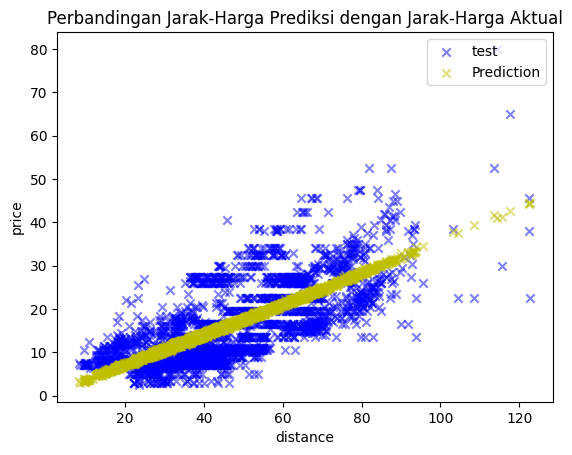

In [ ]:
# Hitung jarak antara X_test dan predictions_lr
distances = np.linalg.norm(X_test - predictions_lr.reshape(-1, 1), axis=1)

# Buat plot
plt.scatter(distances, Y_test, c='b', alpha=0.5, marker='x', label='test')
plt.scatter(distances, predictions_lr, c='y', alpha=0.5, marker='x', label='Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc='upper right')

# Simpan plot setelah menampilkan
plt.savefig("linear_regression.png", bbox_inches="tight", pad_inches=1, transparent=True, orientation='landscape')

# Tampilkan plot
plt.show()


#### Random Forest

In [ ]:
rf_model = model2.fit(X_train, Y_train)

Melakukan prediksi terhadap model Random Forest

In [ ]:
predictions_rf = rf_model.predict(X_test)
l_rf_train_r2 = model2.score(X_train,Y_train)
l_rf_test_r2 = model2.score(X_test, Y_test)
print('Akurasi (Data Pelatihan) : %.4f' % l_rf_train_r2)
print('Akurasi (Data Pengujian): %.4f' % l_rf_test_r2)

Akurasi (Data Pelatihan) : 0.9934
Akurasi (Data Pengujian): 0.9597


Menghitung nilai RMSE

In [ ]:
rf_mse = mean_squared_error(predictions_rf, Y_test)
rf_rmse = np.sqrt(rf_mse)
print('Random Forest Regression RMSE: %.4f' % rf_rmse)

Random Forest Regression RMSE: 1.8248


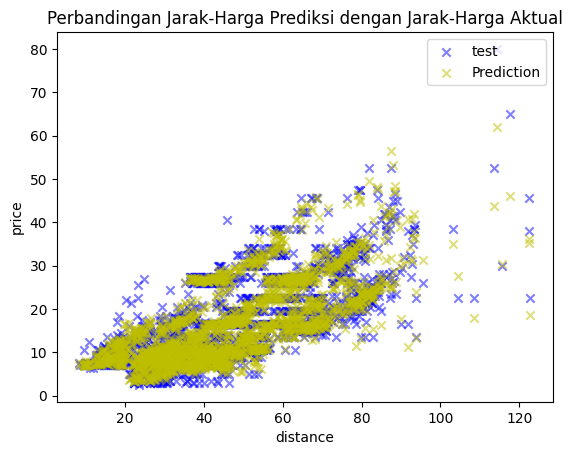

In [ ]:
# Hitung jarak antara titik-titik
distances = np.linalg.norm(X_test - predictions_lr.reshape(-1, 1), axis=1)

# Buat plot
plt.scatter(distances, Y_test, c='b', alpha=0.5, marker='x', label='test')
plt.scatter(distances, predictions_rf, c='y', alpha=0.5, marker='x', label='Prediction')
plt.xlabel('distance')
plt.ylabel('price')
plt.title("Perbandingan Jarak-Harga Prediksi dengan Jarak-Harga Aktual")
plt.legend(loc='upper right')

# Simpan plot
plt.savefig("random_forest.png", bbox_inches="tight", pad_inches=1, transparent=True, orientation='landscape')

# Tampilkan plot
plt.show()

### Model *Inference*

Melihat informasi dari X_fit

In [ ]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12738 entries, 0 to 13817
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   transport_name    12738 non-null  int64
 1   kind              12738 non-null  int64
 2   start             12738 non-null  int64
 3   finish            12738 non-null  int64
 4   visibility        12738 non-null  int64
 5   weather           12738 non-null  int64
 6   distance          12738 non-null  int64
 7   surge_multiplier  12738 non-null  int64
dtypes: int64(8)
memory usage: 895.6 KB


Mendefinisikan 3 data baru yang akan digunakan sebagai data baru untuk didapatkan prediksinya

In [ ]:
X_new = {'transport_name': [1, 2, 3], 'kind': [1, 2, 3], 'start': [1, 2, 3], 'finish': [1, 2, 3], 'visibility': [1, 2, 3], 'weather': [1.25, 2, 3], 'distance': [1, 2, 3],
         'surge_multiplier': [1, 2, 3]}
X_new = pd.DataFrame(X_new)

Hasil prediksi menggunakan linear regression

In [ ]:
y_pred5 = lr_model.predict(X_new)
print('Prediksi Tarif dengan model Linear Regression yaitu: ')
print(y_pred5)

Prediksi Tarif dengan model Linear Regression yaitu: 
[16.99423631 17.56185256 18.11510465]


Hasil prediksi menggunakan Random Forest

In [ ]:
y_pred6 = rf_model.predict(X_new)
print('Prediksi Tarif dengan model Random Forest Regression yaitu: ')
print(y_pred6)

Prediksi Tarif dengan model Random Forest Regression yaitu: 
[11.404 14.46  16.24 ]


## Kesimpulan

In [ ]:
pickle.dump(lr_model, open('model_lr.pkl', "wb"))
pickle.dump(rf_model, open('model_rf.pkl', "wb"))

Dari analisis di atas, dapat diambil beberapa kesimpulan:

1. Dari 57 atribut yang ada, diambil 8 atribut yang paling berpengaruh dalam prediksi harga taksi online, diantaranya kind, distance, surge_multiplier, finish, transport_name, start, visibility, dan weather.
2. Metode pengujian menggunakan 2 model, yaitu linear regression dan random forest regression regressor dengan masing - masing nilai akurasi 50.95% dan 96.29%
3. Model random forest regression adalah model yang paling optimal dengan RMSE sebesar 1.7864